In [1]:
import os
import zipfile
import cv2
import time

## Extraction of dataset


The dataset.zip consists of training and testing images for two classes: handwritten and news images. The news images correspond to printed text in this scenario. The google drive link for the dataset is provided [here.](https://drive.google.com/file/d/1t2vUqL_Y79F_A5N1BaGGMg735QlDA7jG/view?usp=sharing)



In [3]:
local_zip = 'dataset.zip'

zip_dest = zipfile.ZipFile(local_zip,'r')

zip_dest.extractall('dataset')
zip_dest.close()

## Data Exploration

In [2]:
!tree -d dataset

dataset
├── test
│   ├── handwritten
│   └── news
└── train
    ├── handwritten
    └── news

6 directories


In [3]:
base_dir = 'dataset'

train_dir = os.path.join(base_dir,'train')
test_dir = os.path.join(base_dir,'test')

train_hand_dir = os.path.join(train_dir,'handwritten')
train_news_dir = os.path.join(train_dir,'news')

test_hand_dir = os.path.join(test_dir,'handwritten')
test_news_dir = os.path.join(test_dir,'news')

In [4]:
train_hand_names = os.listdir(train_hand_dir)
train_news_names = os.listdir(train_news_dir)

test_hand_names = os.listdir(test_hand_dir)
test_news_names = os.listdir(test_news_dir)

In [5]:
print('total training handwritten images: ',len(os.listdir(train_hand_dir)))
print('total training news images: ',len(os.listdir(train_news_dir)))

print('total testing handwritten images: ',len(os.listdir(test_hand_dir)))
print('total testing news images: ',len(os.listdir(test_news_dir)))

total training handwritten images:  11031
total training news images:  10986
total testing handwritten images:  2500
total testing news images:  2500


In [6]:
x = cv2.imread(train_hand_dir+'/'+train_hand_names[5765])

In [7]:
x.shape

(1000, 754, 3)

The shape of the image is to big for the model, hence it is decreased to 256x256 with the help of the keras image preprocessing library

## Data Visualization

In [19]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# 4x4 configuration for graph 
nrows = 4
ncols = 4

pic_index = 0 # Index for iterating over images

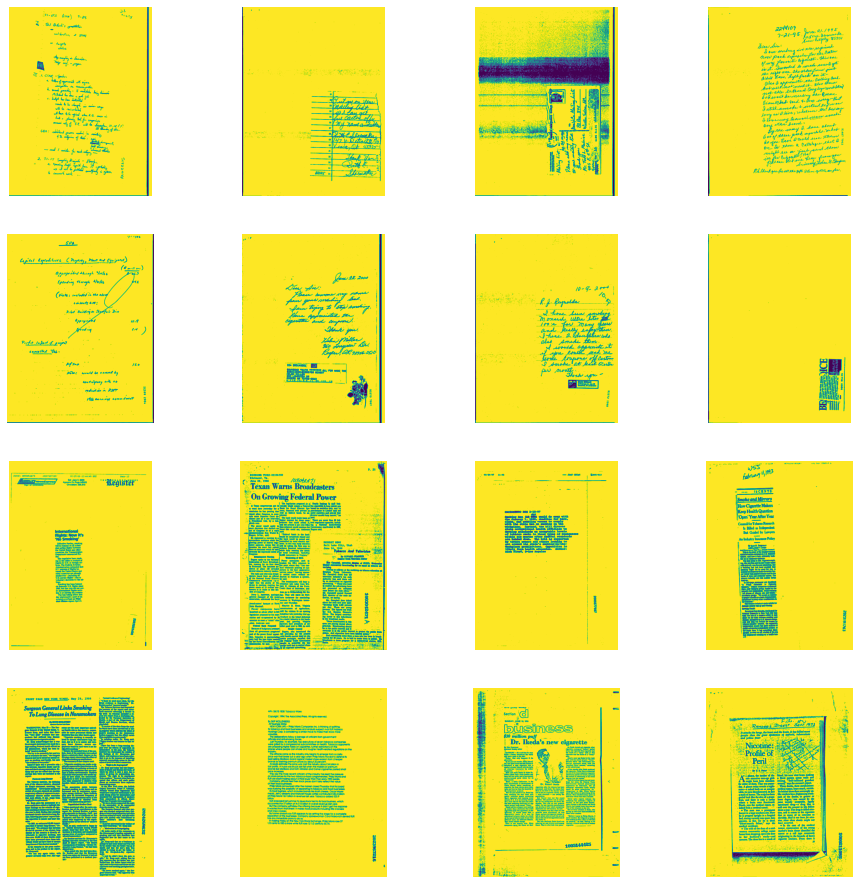

In [20]:
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_hand_pix = [os.path.join(train_hand_dir, fname) 
                for fname in train_hand_names[ pic_index-8:pic_index] 
               ]

next_news_pix = [os.path.join(train_news_dir, fname) 
                for fname in train_news_names[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_hand_pix+next_news_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

The yellow colour as seen above is not indicative of the coulour of the images in the actual dataset, There might be a problem with the rendering with regards to matplotlib. 

## Model Architecture

In [8]:
import tensorflow as tf
import keras
import numpy as np
from keras.models import Sequential, Model
from keras.layers import Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D
from keras.layers import Flatten, Dropout
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras_preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
from keras.callbacks import ModelCheckpoint

/home/ubuntu/anaconda3/envs/tf12/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/ubuntu/anaconda3/envs/tf12/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/ubuntu/anaconda3/envs/tf12/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/ubuntu/anaconda3/envs/tf12/lib/python3.6/site-

This is to test if the Tensorflow version installed is the GPU version

In [9]:
if tf.test.gpu_device_name(): 

    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))

else:

    print("Please install GPU version of TF")
 


Default GPU Device:/device:GPU:0


In [10]:
img_width, img_height =256,256 #target image size for the model

In [11]:
model_final = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(filters=16,kernel_size=(3,3),activation = 'relu',input_shape= (img_width, img_height,3)),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

        tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation = 'relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

        tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation = 'relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

        tf.keras.layers.Flatten(),

        tf.keras.layers.Dense(units = 256,activation = 'relu'),

        tf.keras.layers.Dense(1,activation='sigmoid')
])

In [12]:
model_final.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 57600)             0         
__________

## Data Preprocessing

In [13]:
TRAINING_DIR = "dataset/train/"
training_datagen = ImageDataGenerator(rescale = 1./255,
                    )

TEST_DIR = "dataset/test/"
validation_datagen = ImageDataGenerator(rescale = 1./255,
                    )

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
    #color_mode="grayscale",
	target_size=(256,256),
    class_mode = 'binary',
  batch_size=32,

)

validation_generator = validation_datagen.flow_from_directory(
	TEST_DIR,
	target_size=(256,256),
  #color_mode="grayscale",
 class_mode = 'binary',
  batch_size=32,

)

Found 22017 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [14]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size #steps per epoch for training 
STEP_SIZE_TEST=validation_generator.n//validation_generator.batch_size #steps per epoch for validation/testing

In [15]:
print((STEP_SIZE_TRAIN,STEP_SIZE_TEST))

(688, 156)


If you try to train the model again, change the name of acc to accuracy and val_acc to val_accuracy if the model doesn't train 
different versions of tensorflow have different names for this.

In [16]:
start_time = time.time()

model_final.compile(loss='binary_crossentropy' ,optimizer = 'adam', metrics=['acc'])

##
mc = ModelCheckpoint('model/best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

history = model_final.fit(train_generator,
                              validation_data = validation_generator,
                              steps_per_epoch = STEP_SIZE_TRAIN,
                              validation_steps = STEP_SIZE_TEST,
                              epochs = 5, verbose = 1, callbacks=[mc])

print("The model took", (time.time() - start_time)/60,"minutes to train")

Epoch 1/5
687/688 [============================>.] - ETA: 0s - loss: 0.1462 - acc: 0.9426
Epoch 00001: val_acc improved from -inf to 0.98037, saving model to best_model.h5
688/688 [==============================] - 86s 124ms/step - loss: 0.1462 - acc: 0.9426 - val_loss: 0.0574 - val_acc: 0.9804
Epoch 2/5
687/688 [============================>.] - ETA: 0s - loss: 0.0365 - acc: 0.9882
Epoch 00002: val_acc improved from 0.98037 to 0.98758, saving model to best_model.h5
688/688 [==============================] - 86s 125ms/step - loss: 0.0364 - acc: 0.9882 - val_loss: 0.0341 - val_acc: 0.9876
Epoch 3/5
687/688 [============================>.] - ETA: 0s - loss: 0.0164 - acc: 0.9940
Epoch 00003: val_acc did not improve from 0.98758
688/688 [==============================] - 84s 122ms/step - loss: 0.0164 - acc: 0.9940 - val_loss: 0.0421 - val_acc: 0.9876
Epoch 4/5
687/688 [============================>.] - ETA: 0s - loss: 0.0120 - acc: 0.9957
Epoch 00004: val_acc did not improve from 0.98758
6

## Performance Metrics

### Model accuracy and loss for training and validation sets

In [17]:
print('model accuracy for training: ',round(history.history['acc'][-1],5)*100,'%')
print('model accuracy for testing/validation: ',round(history.history['val_acc'][-1],5)*100,'%')
print('model loss for training: ',round(history.history['loss'][-1],4))
print('model loss for testing/validation:',round(history.history['val_loss'][-1],4))

model accuracy for training:  99.741 %
model accuracy for testing/validation:  98.778 %
model loss for training:  0.0081
model loss for testing/validation: 0.0427


### Performance Learning Curve

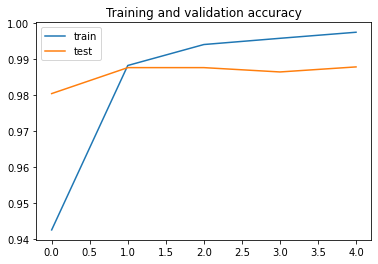

In [21]:
pyplot.plot(history.history['acc'], label='train')
pyplot.plot(history.history['val_acc'], label='test')
plt.title('Training and validation accuracy')
pyplot.legend()
pyplot.savefig('images_for_display/acc_learning_curve.png')

### Optimization Learning Curve

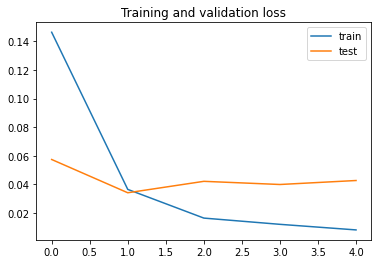

In [22]:
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
plt.title('Training and validation loss')
pyplot.legend()
pyplot.savefig('images_for_display/loss_learning_curve.png')

## Testing of Model

The trained model is stored in a google drive as it is too big to store, the link for the model is [here.](https://drive.google.com/file/d/1R8QJ_-dlPDf3RVphBzrf0ZTXkvjJmSyU/view?usp=sharing) 
place it in the model folder 

In [25]:
model = tf.keras.models.load_model('model/best_model.h5')

In [26]:
from keras.preprocessing import image
from PIL import Image
from IPython.display import display

In [27]:
def testing(model,image_name):
    """
    model - name of the tensorflow model
    image_name - name of the image to test with the path
    """
    start_time = time.time()
    img = image.load_img('images_for_testing/'+image_name,target_size=(256,256))

    x = image.img_to_array(img)
    x = np.expand_dims(x,axis = 0)
    images = np.vstack([x])

    classes = model_final.predict(images,batch_size = 10)


    if classes[0]>0.5:
        print('the image is printed text (newspaper)')
    else:
        print('the image is handwritten text')

    print("The model took", round((time.time() - start_time),4),"seconds to classify the image")

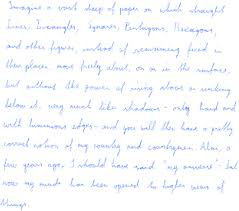

In [28]:
im = Image.open('images_for_testing/handwritten.jpeg')
display(im)

In [29]:
testing(model,'handwritten.jpeg')

the image is handwritten text
The model took 0.0613 seconds to classify the image


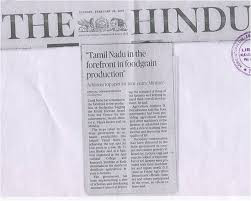

In [30]:
im = Image.open('images_for_testing/newspaper.jpeg')
display(im)

In [31]:
testing(model,'newspaper.jpeg')

the image is printed text (newspaper)
The model took 0.0041 seconds to classify the image
